In [1]:
from scipy.fft import fft2, ifft2, fftfreq, fftshift
import numpy as np
import matplotlib.pyplot as plt

In [2]:
λ = 0.0005
σ = 0.7

In [3]:
# Para z = 100
z = 100
W = σ*np.sqrt(1+((λ*z)/(np.pi*σ**2))**2)
R = z*(1+((np.pi*σ**2)/(λ*z))**2)
ζ = np.arctan((λ*z)/(np.pi*σ**2)) 

In [4]:
N = 100
lim = 2.5
x = np.linspace(-lim, lim, N)
Δx = x[1]-x[0]
y = np.linspace(-lim, lim, N)
Δy = y[1]-y[0]
X, Y = np.meshgrid(x, y)

In [5]:
U0 = np.exp(-(X**2+Y**2)/σ**2)   # Campo de entrada
I0 = np.max(abs(U0)**2)          # Intensidad en el centro del haz (para normalizar)

In [6]:
U_a = (σ/W)*np.exp(-(X**2+Y**2)/W**2)*np.exp(-1j*(2*np.pi*z/λ+np.pi*(X**2+Y**2)/(λ*R)-ζ))   # Campo en z, expresión analítica

In [7]:
# Para comparar el campo se compararán las partes real e imaginaria del campo
U_ar = U_a.real
U_ai = U_a.imag

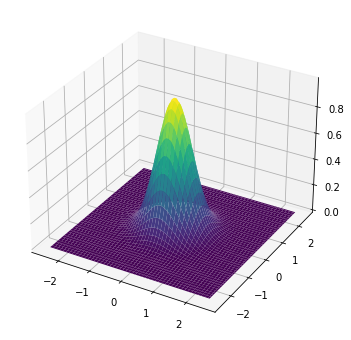

In [8]:
# Parte real analítica
plt.figure(figsize=(6,6))
plt.axes(projection='3d').plot_surface(X,Y,abs(U_ar),cmap='viridis')
plt.show()

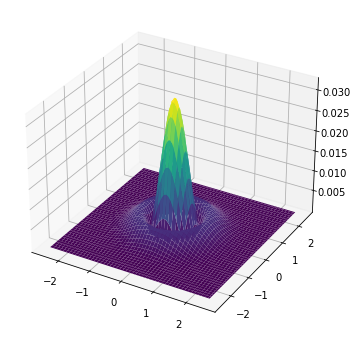

In [9]:
# Parte imaginaria analítica
plt.figure(figsize=(6,6))
plt.axes(projection='3d').plot_surface(X,Y,abs(U_ai),cmap='viridis')
plt.show()

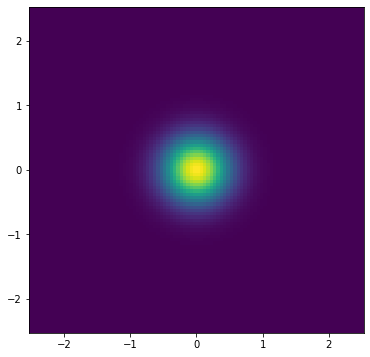

In [10]:
# Intensidad analítica
plt.figure(figsize=(6,6))
plt.pcolormesh(X,Y,abs(U_a)**2/I0,shading='auto', vmin=0., vmax=1)
plt.show()

In [11]:
fx = fftshift(fftfreq(N, Δx))
Δfx = fx[1]-fx[0]
fy = fftshift(fftfreq(N, Δy))
Δfy = fy[1]-fy[0]
Fx, Fy = np.meshgrid(fx, fy)

In [12]:
fftU = fftshift(fft2(U0))                        # Transformada del campo de entrada
α = 2*np.pi*np.sqrt(abs(1/λ**2-(Fx**2+Fy**2)))
H = np.exp(1j*α*z)                               # Función de transferencia

In [13]:
U_n = (ifft2(fftU*H))   # Campo numérico a una distancia z

In [14]:
U_nr = U_n.real
U_ni = U_n.imag

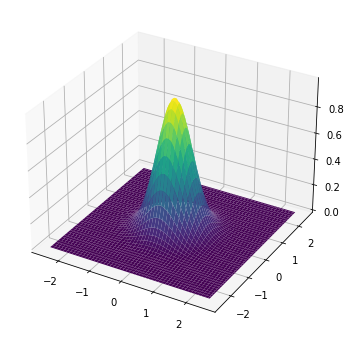

In [15]:
# Parte real numérica
plt.figure(figsize=(6,6))
plt.axes(projection='3d').plot_surface(X,Y,abs(U_nr),cmap='viridis')
plt.show()

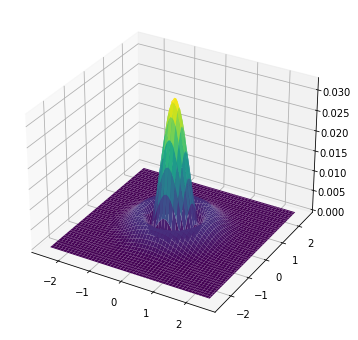

In [16]:
# Parte imaginaria numérica
plt.figure(figsize=(6,6))
plt.axes(projection='3d').plot_surface(X,Y,abs(U_ni),cmap='viridis')
plt.show()

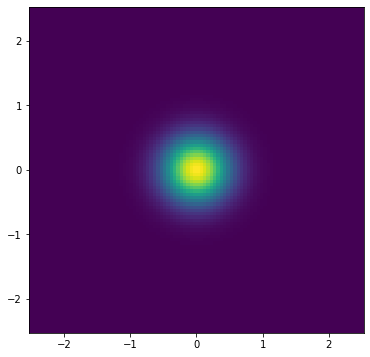

In [17]:
# Intensidad numérica
plt.figure(figsize=(6,6))
plt.pcolormesh(X,Y,abs(U_n)**2/I0,shading='auto', vmin=0., vmax=1.)
plt.show()

In [18]:
# Para z = 2000
z = 2000
W = σ*np.sqrt(1+((λ*z)/(np.pi*σ**2))**2)
R = z*(1+((np.pi*σ**2)/(λ*z))**2)
ζ = np.arctan((λ*z)/(np.pi*σ**2)) 

In [19]:
U_a = (σ/W)*np.exp(-(X**2+Y**2)/W**2)*np.exp(-1j*(2*np.pi*z/λ+np.pi*(X**2+Y**2)/(λ*R)-ζ))
U_ar = U_a.real
U_ai = U_a.imag
H = np.exp(1j*α*z)
U_n = (ifft2(fftU*H))

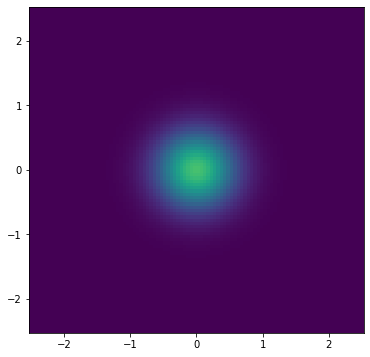

In [20]:
# Intensidad analítica para z = 2000
plt.figure(figsize=(6,6))
plt.pcolormesh(X,Y,abs(U_a)**2/I0,shading='auto', vmin=0., vmax=1)
plt.show()

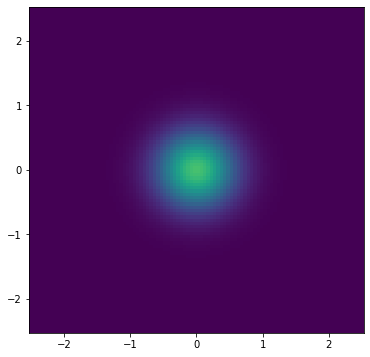

In [21]:
# Intensidad numérica para z = 2000
plt.figure(figsize=(6,6))
plt.pcolormesh(X,Y,abs(U_n)**2/I0,shading='auto', vmin=0., vmax=1.)
plt.show()